# Exploratory Data Analysis: Diabetes Dataset

# Business Problem

This study aims to perform exploratory data analysis using the diabetes dataset.

# Dataset Story

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

**Information about dataset attributes**:

***Pregnancies***: To express the Number of pregnancies

***Glucose***: To express the Glucose level in blood

***BloodPressure***: To express the Blood pressure measurement

***SkinThickness***: To express the thickness of the skin

***Insulin***: To express the Insulin level in blood

***BMI***: To express the Body mass index

***DiabetesPedigreeFunction***: To express the Diabetes percentage

***Age***: To express the age

***Outcome***: To express the final result 1 is Yes and 0 is No

# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import io

# Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Import Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Humphrey-Galiwango99/MCS-7103-EDA-Assignment/main/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1


# General Information About to Dataset

In [ ]:
def check_df(dataframe, head=5):
    print(20*"#", "Head", 20*"#")
    print(dataframe.head(head))
    print(20*"#", "Tail", 20*"#")
    print(dataframe.tail(head))
    print(20*"#", "Shape", 20*"#")
    print(dataframe.shape)
    print(20*"#", "Type", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "NA", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "Quartiles", 20*"#")
    print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1
#################### Tail ####################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
764            2      

# Analysis of Categorical and Numerical Columns

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    # categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = num_but_cat + cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # numerical
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"] and col not in cat_cols]

    if report:
        print(f"Observation: {df.shape[0]}")
        print(f"Variables: {df.shape[1]}")
        print(f"Cat Cols: {len(cat_cols)}")
        print(f"Num Cols: {len(num_cols)}")
        print(f"Cat But Car Cols: {len(cat_but_car)}")
        print(f"Num but Cat Cols: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, report=True)

Observation: 768
Variables: 9
Cat Cols: 1
Num Cols: 8
Cat But Car Cols: 0
Num but Cat Cols: 1


In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#",col_name,20*"#")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                 "Ratio":100* dataframe[col_name].value_counts()/ len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [ ]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if str(df[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

#################### Outcome ####################
         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


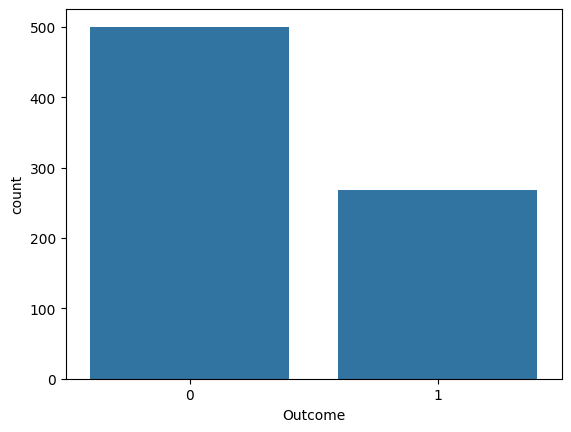

In [ ]:
cat_summary_df(df)

In [ ]:
def num_summary(dataframe, num_col, plot=False):
    print(20*"#", num_col, 20*"#")
    quartiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[num_col].describe(quartiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [ ]:
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

#################### Pregnancies ####################
count   768.000
mean      3.845
std       3.370
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


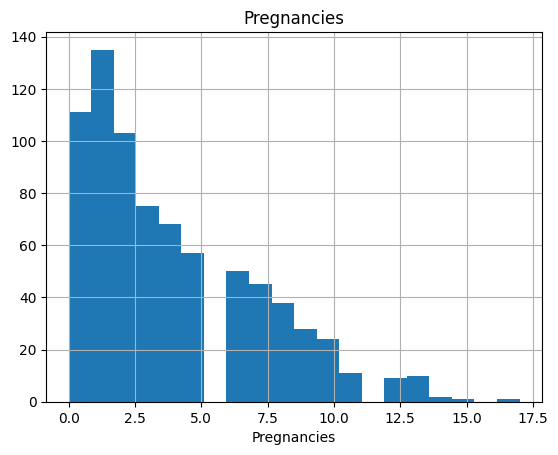

#################### Glucose ####################
count   768.000
mean    120.895
std      31.973
min       0.000
1%       57.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


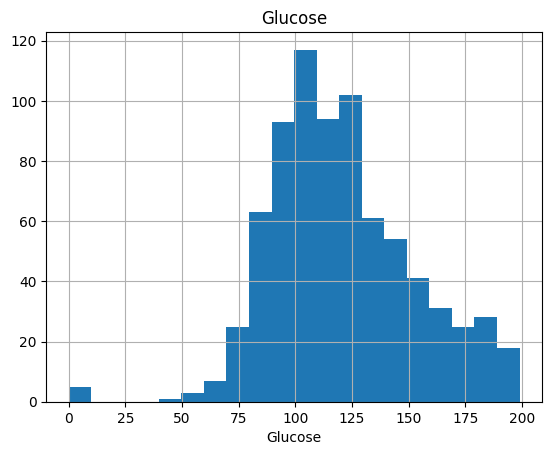

#################### BloodPressure ####################
count   768.000
mean     69.105
std      19.356
min       0.000
1%        0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


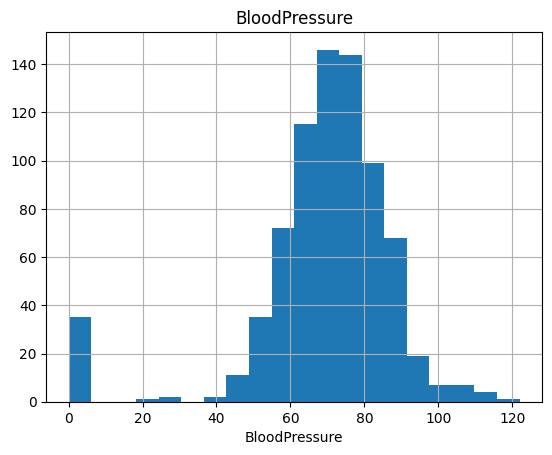

#################### SkinThickness ####################
count   768.000
mean     20.536
std      15.952
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


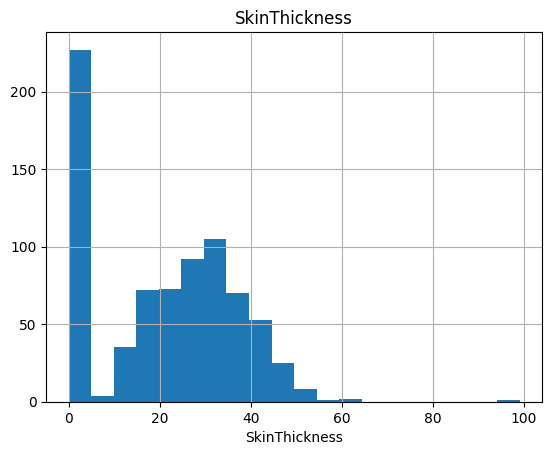

#################### Insulin ####################
count   768.000
mean     79.799
std     115.244
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


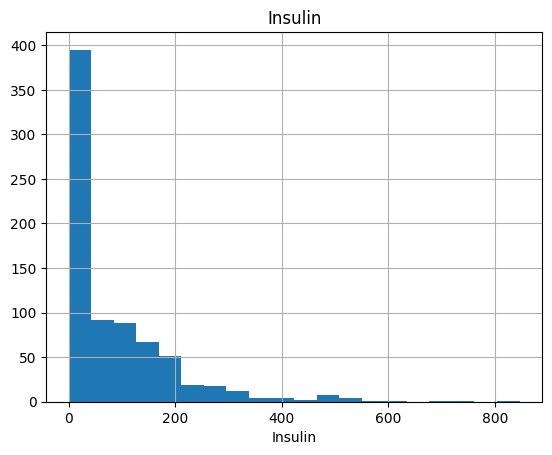

#################### BMI ####################
count   768.000
mean     31.993
std       7.884
min       0.000
1%        0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


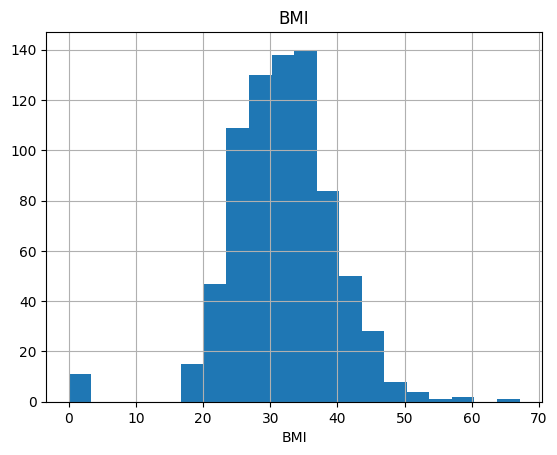

#################### DiabetesPedigreeFunction ####################
count   768.000
mean      0.472
std       0.331
min       0.078
1%        0.095
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


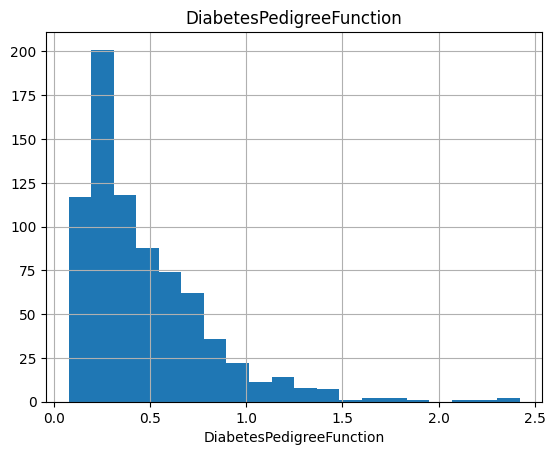

#################### Age ####################
count   768.000
mean     33.241
std      11.760
min      21.000
1%       21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


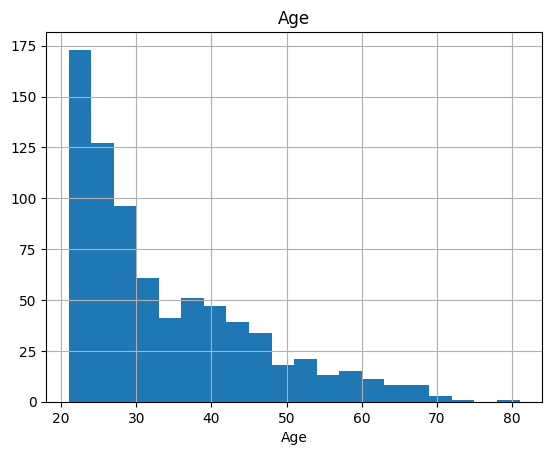

In [ ]:
num_summary_df(df)

In [ ]:
def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols,4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

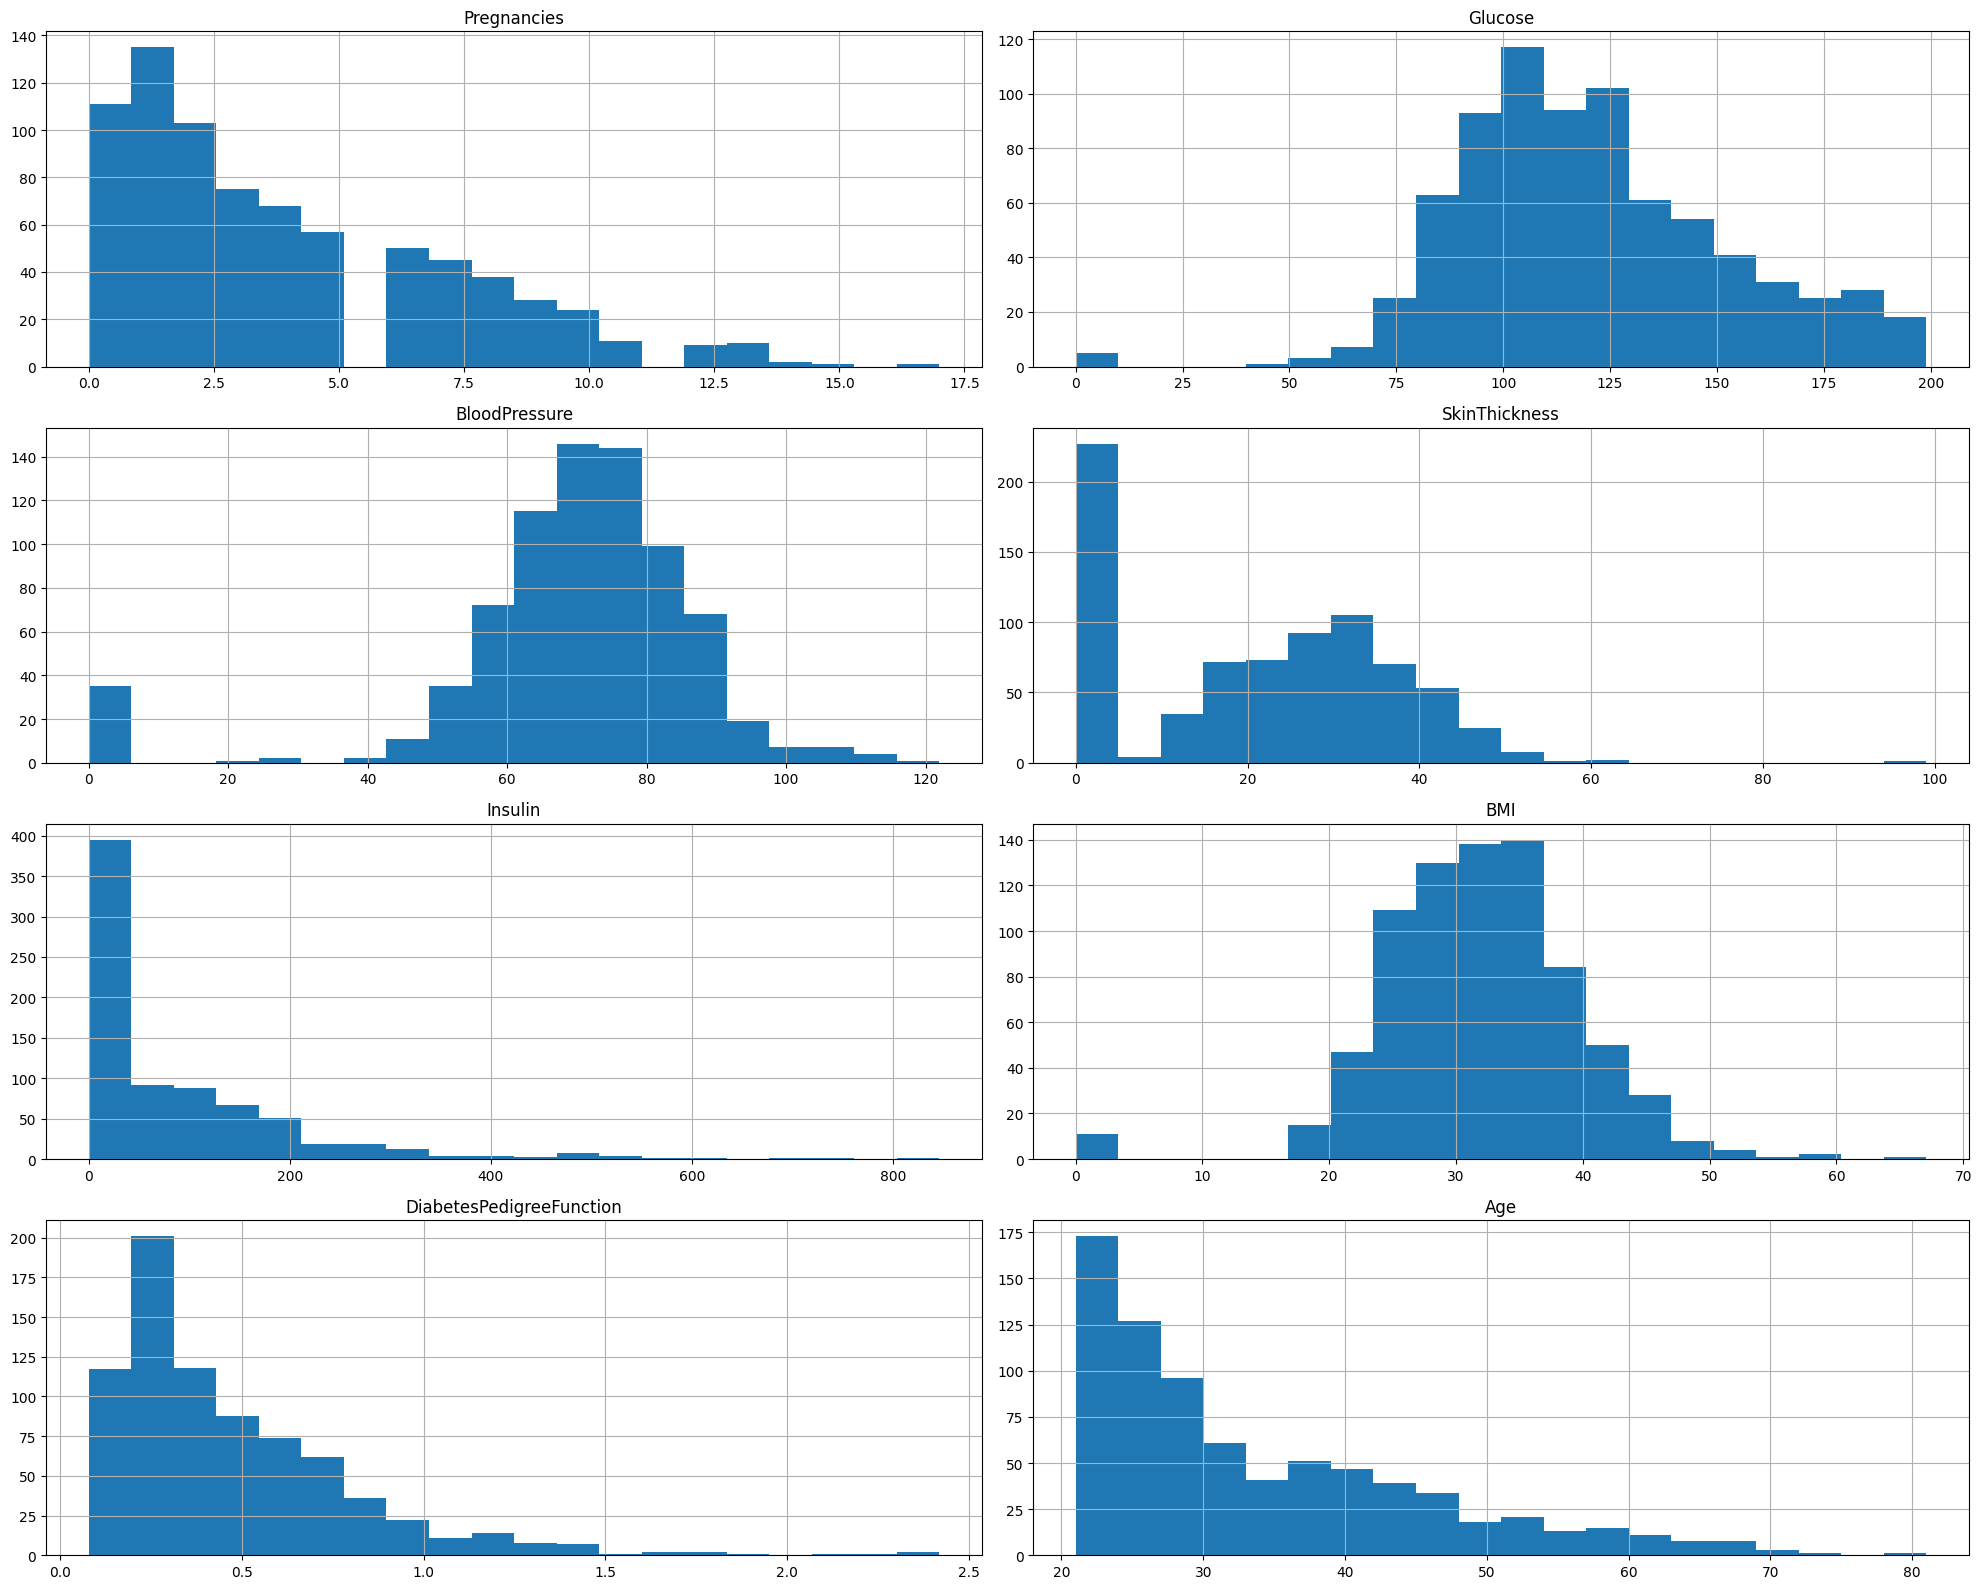

In [ ]:
plot_num_summary(df)

# Target Analysis

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(20*"#", target, "==>", numerical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [ ]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [ ]:
target_summary_with_num_df(df, "Outcome")

#################### Outcome ==> Pregnancies ####################
         Target Mean
Outcome             
0              3.298
1              4.866
#################### Outcome ==> Glucose ####################
         Target Mean
Outcome             
0            109.980
1            141.257
#################### Outcome ==> BloodPressure ####################
         Target Mean
Outcome             
0             68.184
1             70.825
#################### Outcome ==> SkinThickness ####################
         Target Mean
Outcome             
0             19.664
1             22.164
#################### Outcome ==> Insulin ####################
         Target Mean
Outcome             
0             68.792
1            100.336
#################### Outcome ==> BMI ####################
         Target Mean
Outcome             
0             30.304
1             35.143
#################### Outcome ==> DiabetesPedigreeFunction ####################
         Target Mean
Outcome     

# Correlation Analysis

In [ ]:
def high_corralated_cols(dataframe, corr_th=0.90, plot=False, remove=False):
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"#", "After Correlation Anlysis, You Don't Need to Remove Variables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    if plot:
        sns.set(rc={'figure.figsize': (6,3)})
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True, fmt=".2f")
        plt.show(block=True)

    return drop_list

#################### After Correlation Anlysis, You Don't Need to Remove Variables ####################


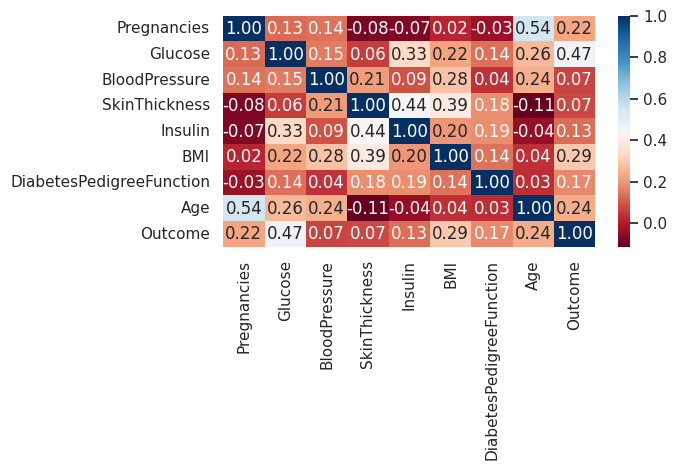

In [ ]:
drop_list = high_corralated_cols(df, plot=True, remove=True)